In [294]:
import pandocfilters
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
%reload_ext watermark
%watermark -a "Matheus" --iversions


Author: Matheus

numpy     : 1.24.3
pandas    : 2.0.3
matplotlib: 3.7.2
seaborn   : 0.12.2



In [3]:
#Loading data 

df = pd.read_csv('data/vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [190]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# EDA 

## Separating Categorical and Numerical Variables 

In [9]:
cats = ['Rank','Name','Platform','Publisher', 'Year','Genre']

In [10]:
nums = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [11]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [12]:
df[cats].astype(object).describe()

,Rank,Name,Platform,Publisher,Year,Genre
count,16598,16598,16598,16540,16327.0,16598
unique,16598,11493,31,578,39.0,12
top,1,Need for Speed: Most Wanted,DS,Electronic Arts,2009.0,Action
freq,1,12,2163,1351,1431.0,3316


In [13]:
df['Year'].value_counts().sort_values(ascending=False)


Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

In [14]:
df['Year'] = df['Year'].fillna(0).astype(int)

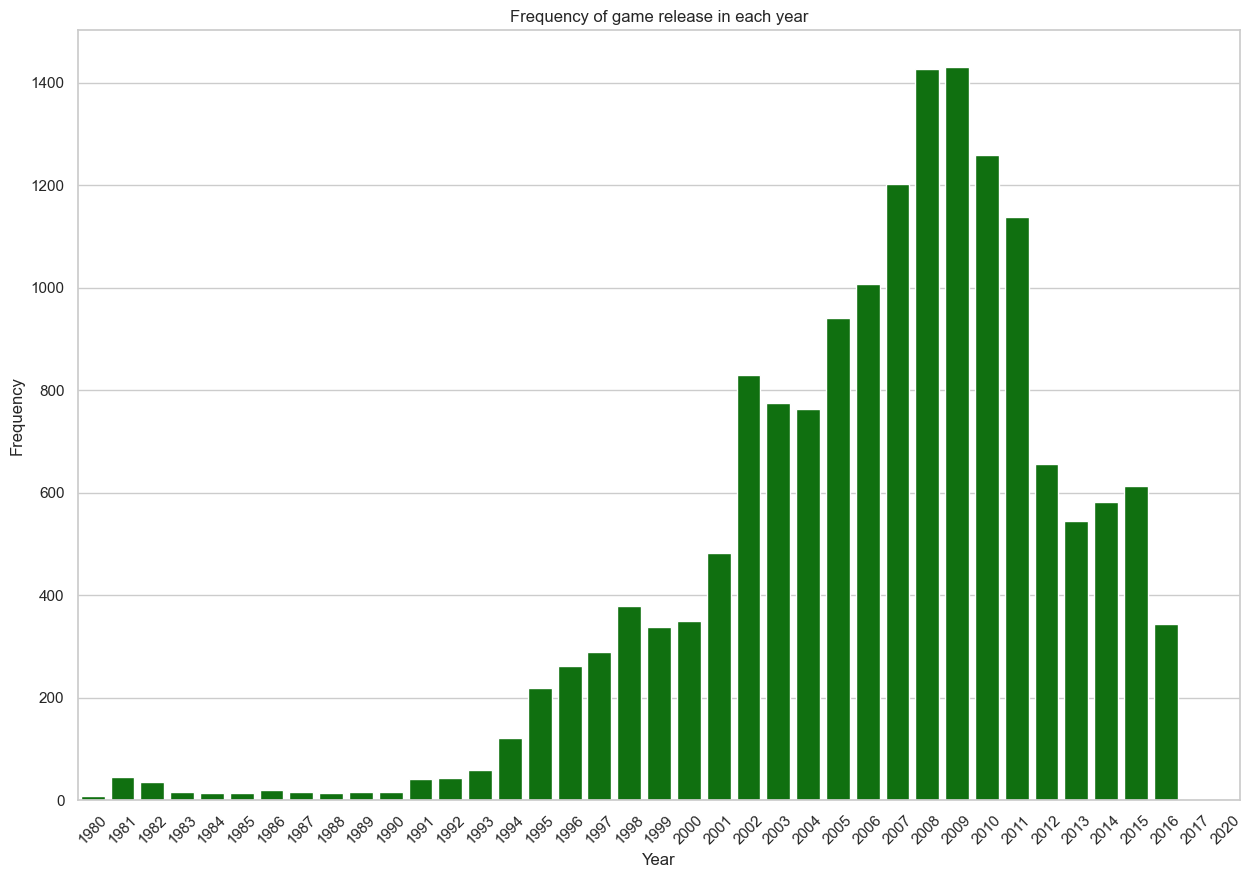

In [15]:
plt.figure(figsize = (15,10))
sns.set(style="whitegrid")

# Create the barplot using seaborn
ax = sns.countplot(x = df.Year[df['Year'] > 0], color = 'green', orient = 'v')

# Set the title and labels
ax.set_title("Frequency of game release in each year")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
plt.xticks(rotation=45)
# Show the plot
plt.show()

### Seems like the release of games between 80's and 90's had a little amount of releases, which it's comprehensive because of the existing technology during that time, turning the develope of games difficult and expensive. Between 1990 and 2010, had a great increase in the number of released games, where the popularity of video games increased due to the video games turned cheaper and accessible while the technology evolves. After 2010, the released games have been expressively reducing by the years, it may be due to the advance of the technologies and increasing the amount of money and time invested to develope new games, where these games have nowadays the level of film productions, resuting in a less number of releases.

## Sales in America

<Axes: xlabel='NA_Sales', ylabel='Count'>

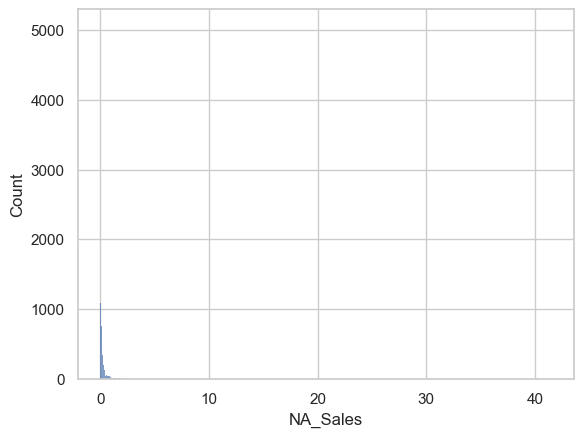

In [16]:
sns.histplot(df.NA_Sales)

<Axes: xlabel='NA_Sales', ylabel='Count'>

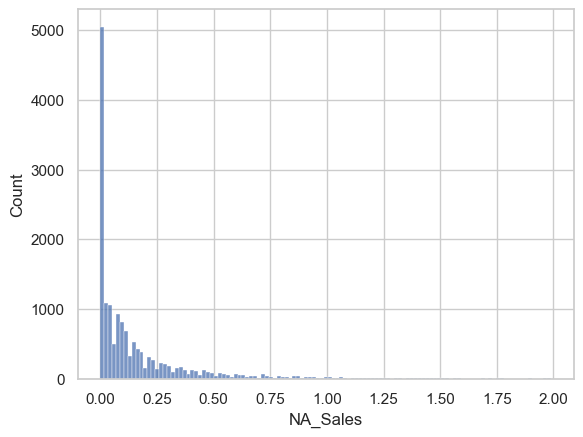

In [17]:
sns.histplot(df.NA_Sales[df['NA_Sales'] <2 ])

## Sales in Europe 

<Axes: xlabel='EU_Sales', ylabel='Count'>

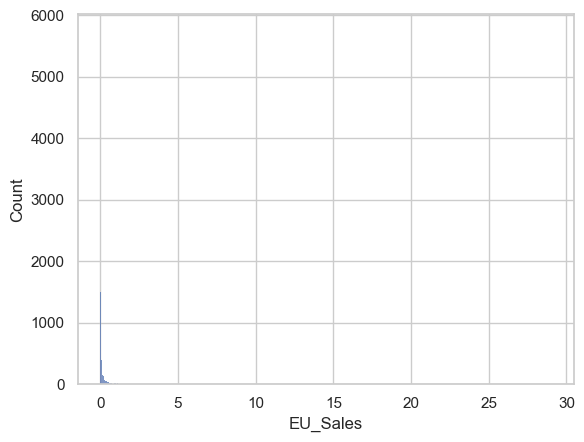

In [18]:
sns.histplot(df.EU_Sales)

<Axes: xlabel='EU_Sales', ylabel='Count'>

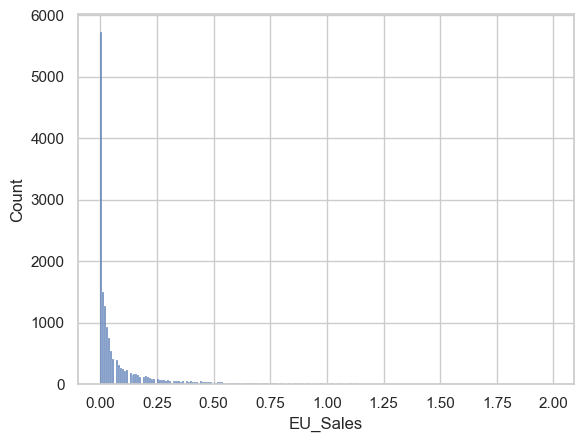

In [19]:
sns.histplot(df.EU_Sales[df['EU_Sales'] <2 ])

## Sales in Japan 

<Axes: xlabel='JP_Sales', ylabel='Count'>

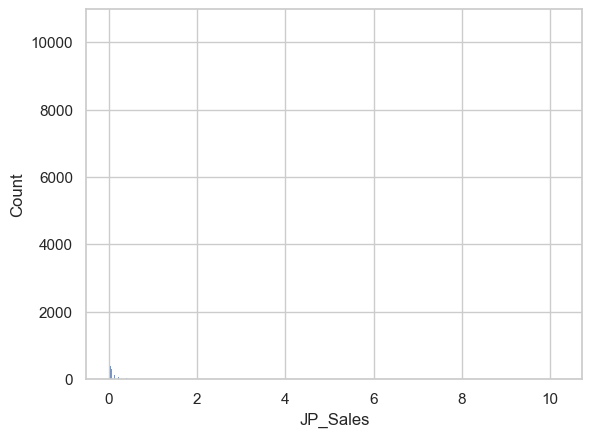

In [20]:
sns.histplot(df['JP_Sales'])

<Axes: xlabel='JP_Sales', ylabel='Count'>

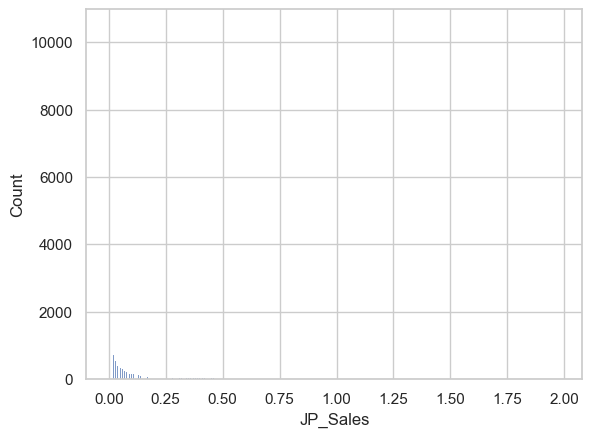

In [21]:
sns.histplot(df.JP_Sales[df['JP_Sales'] < 2])

## Sales in the rest of the world

<Axes: xlabel='Other_Sales', ylabel='Count'>

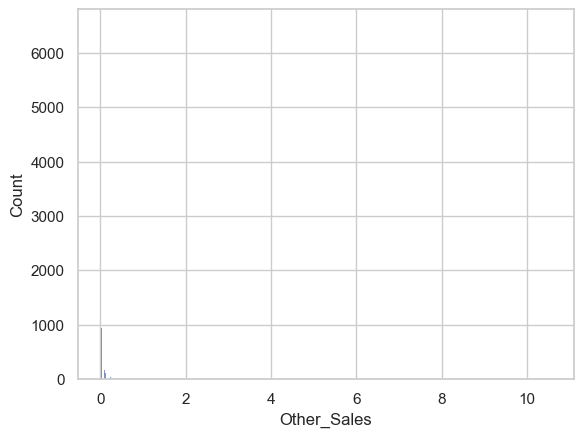

In [22]:
sns.histplot(df['Other_Sales'])

<Axes: xlabel='Other_Sales', ylabel='Count'>

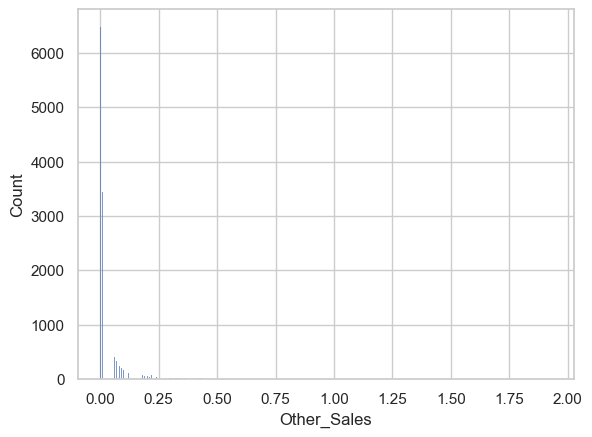

In [23]:
sns.histplot(df.Other_Sales[df['Other_Sales'] < 2])

## Total sales around the world

<Axes: xlabel='Global_Sales', ylabel='Count'>

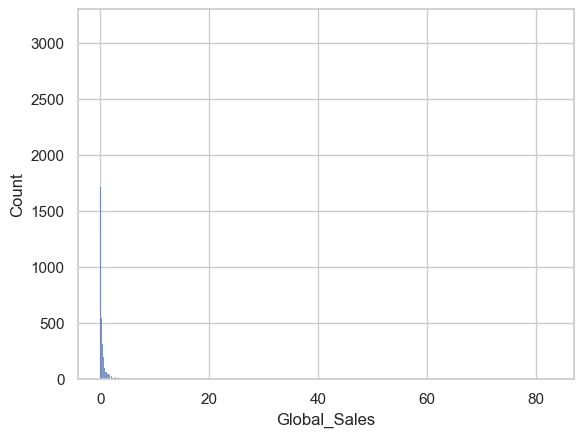

In [24]:
sns.histplot(df['Global_Sales'])

<Axes: xlabel='Global_Sales', ylabel='Count'>

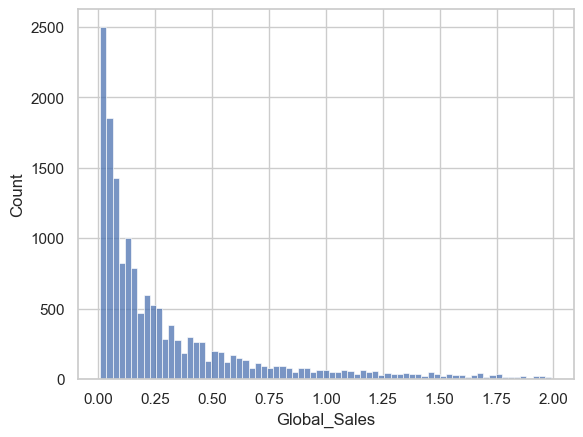

In [25]:
sns.histplot(df.Global_Sales[df['Global_Sales'] < 2])

### With the graphical analysis, seems that the sales are mostly under 2 million copies 

## Lets see the 10 most selled games between 1980 and 2020

In [73]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [54]:
df.groupby('Name')[['Global_Sales','Genre']].agg({'Global_Sales':'sum', 'Genre':'last'}).reset_index().sort_values(by = 'Global_Sales', ascending= False).head(10)

,Name,Global_Sales,Genre
11007,Wii Sports,82.74,Sports
3712,Grand Theft Auto V,55.92,Action
9327,Super Mario Bros.,45.31,Platform
9715,Tetris,35.84,Puzzle
5573,Mario Kart Wii,35.82,Racing
11009,Wii Sports Resort,33.00,Sports
7346,Pokemon Red/Pokemon Blue,31.37,Role-Playing
1222,Call of Duty: Black Ops,31.03,Shooter
1228,Call of Duty: Modern Warfare 3,30.83,Shooter
6723,New Super Mario Bros.,30.01,Platform


In [47]:
df_MPGS = df.groupby('Name')[['Global_Sales']].agg({'Global_Sales':'sum'}).reset_index().sort_values(by = 'Global_Sales', ascending= False).head(10)

In [45]:
df_MPGS.sort_values(by = 'Global_Sales', ascending= False).head(10)

,Name,Global_Sales
11007,Wii Sports,82.74
3712,Grand Theft Auto V,55.92
9327,Super Mario Bros.,45.31
9715,Tetris,35.84
5573,Mario Kart Wii,35.82
11009,Wii Sports Resort,33.00
7346,Pokemon Red/Pokemon Blue,31.37
1222,Call of Duty: Black Ops,31.03
1228,Call of Duty: Modern Warfare 3,30.83
6723,New Super Mario Bros.,30.01


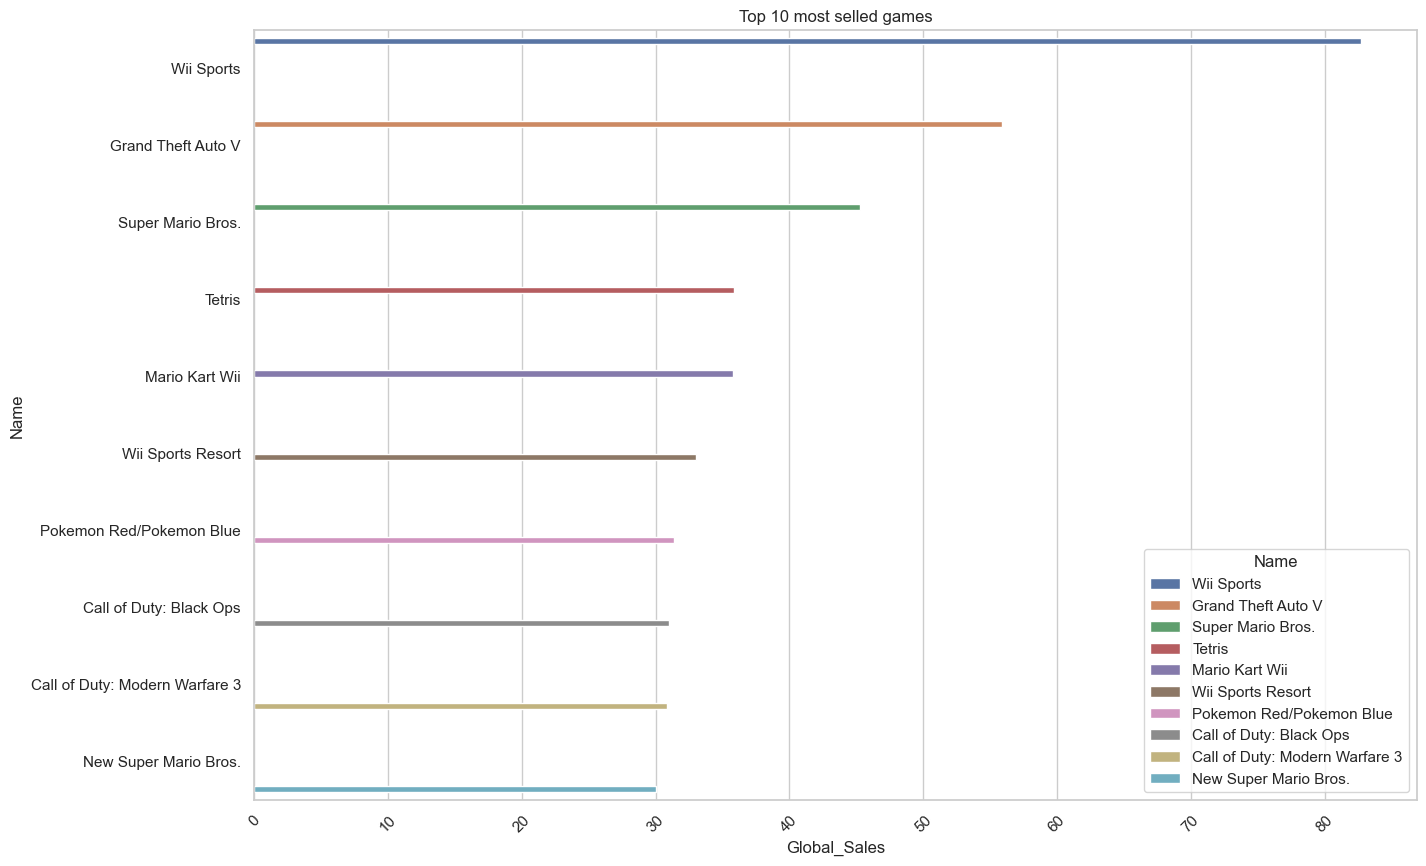

<Figure size 2000x1000 with 0 Axes>

In [72]:
plt.figure(figsize = (15,10))
sns.barplot(hue= df_MPGS.Name, y = df_MPGS.Name, x= df_MPGS.Global_Sales)
plt.xticks(rotation=45)
plt.title('Top 10 most selled games')
plt.figure(figsize = (20,10))
plt.show()

# Realesed games by platform

In [164]:
dfGP = pd.crosstab(df['Platform'], df['Genre'])

In [165]:
dfGP['Total'] = dfGP.sum(axis= 1)

In [166]:
dfGP.sort_values(by = 'Total', ascending= False)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265
PSP,222,213,74,106,36,44,65,192,37,29,135,60,1213
PS,157,69,108,76,64,32,145,97,96,60,222,70,1196
PC,165,65,6,24,11,25,60,104,148,115,49,188,960
XB,155,26,48,46,49,7,123,23,132,24,170,21,824


In [147]:
dfGP.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy',
       'Total'],
      dtype='object', name='Genre')

In [171]:
dfGP_Top10 = dfGP.sort_values(by='Total', ascending= False).head(10)

In [172]:
dfGP_Top10

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265
PSP,222,213,74,106,36,44,65,192,37,29,135,60,1213
PS,157,69,108,76,64,32,145,97,96,60,222,70,1196
PC,165,65,6,24,11,25,60,104,148,115,49,188,960
XB,155,26,48,46,49,7,123,23,132,24,170,21,824


In [152]:
total_genres = pd.Series()

In [153]:
for i in dfGP.columns:
    total_genres[i] = dfGP[i].sum()

In [154]:
total_genres

Action           3316
Adventure        1286
Fighting          848
Misc             1739
Platform          886
Puzzle            582
Racing           1249
Role-Playing     1488
Shooter          1310
Simulation        867
Sports           2346
Strategy          681
Total           16598
dtype: int64

In [161]:
pd.DataFrame(total_genres).transpose().rename({0:'Total'})

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Total,3316,1286,848,1739,886,582,1249,1488,1310,867,2346,681,16598


In [173]:
dfGP_Top10 = pd.concat([dfGP_Top10,pd.DataFrame(total_genres).transpose().rename({0:'Total_Genres'})])

In [174]:
dfGP_Top10

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
PS2,348,196,150,222,103,18,216,187,160,90,400,71,2161
PS3,380,74,76,124,37,3,92,119,156,31,213,24,1329
Wii,238,84,42,280,58,55,94,35,66,87,261,25,1325
X360,324,47,65,126,24,7,105,76,203,40,220,28,1265
PSP,222,213,74,106,36,44,65,192,37,29,135,60,1213
PS,157,69,108,76,64,32,145,97,96,60,222,70,1196
PC,165,65,6,24,11,25,60,104,148,115,49,188,960
XB,155,26,48,46,49,7,123,23,132,24,170,21,824
GBA,167,38,23,110,142,41,64,73,40,18,88,18,822


Text(0.5, 77.24999999999999, 'Genres')

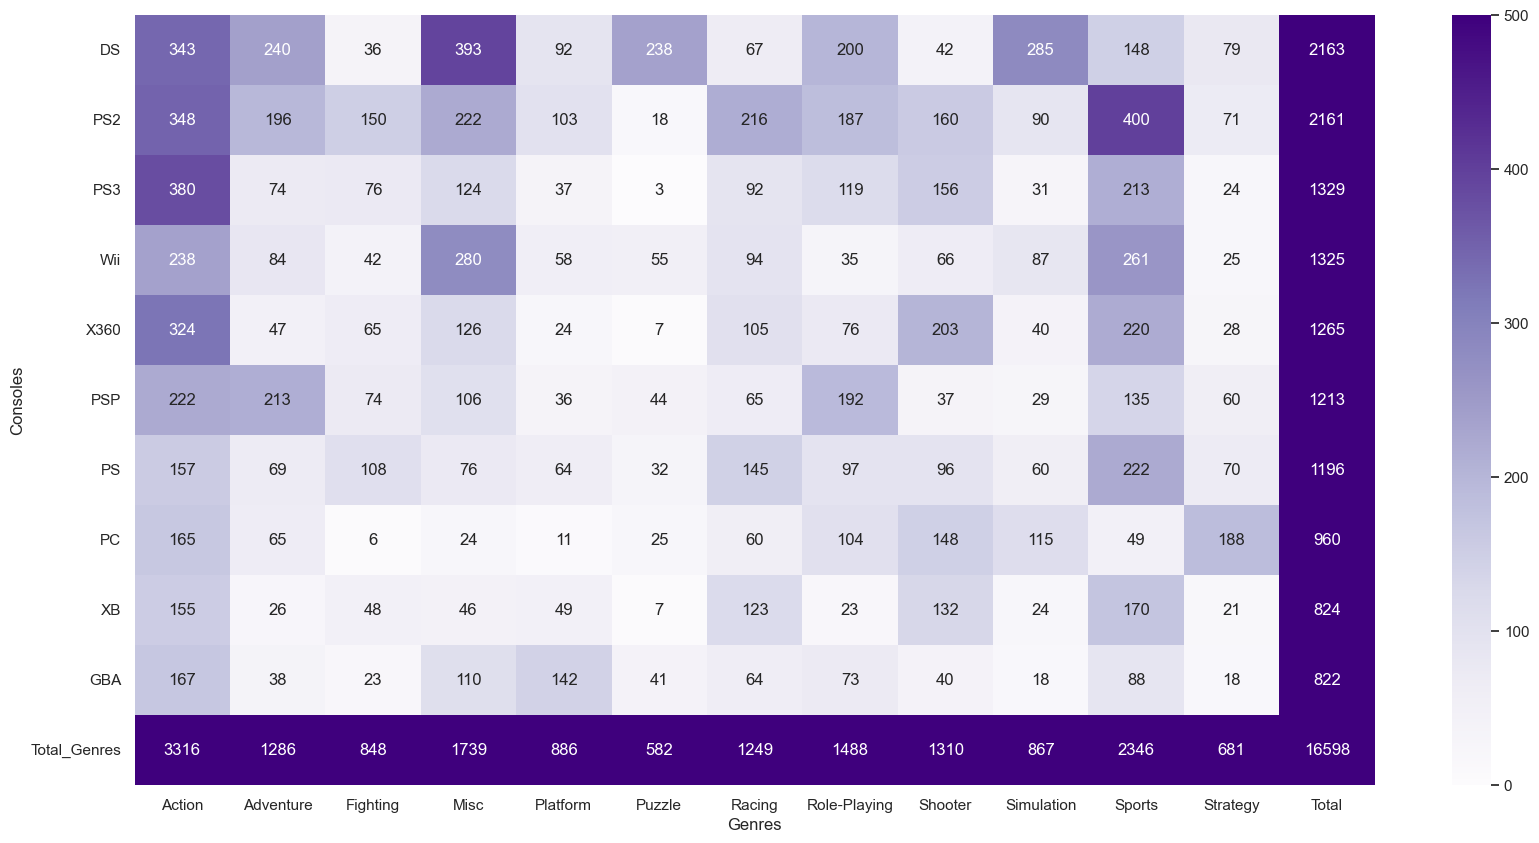

In [188]:
plt.figure(figsize=(20,10))
sns.heatmap(dfGP_Top10,
           cmap='Purples',
           annot= True,
           fmt= 'd',
           vmax=500,
           vmin = 0)
plt.yticks(rotation = 0)
plt.ylabel('Consoles')
plt.xlabel('Genres')

## Analysing the heat map, we see that games with the genres of Action, Sports, Misc and RPG have grater success (seeing the amount of realesed games) than other genres, which explain why franchises like Call of Duty, GTA, Fifa, Nba, Just dance and Final Fantasy does so much success with the users. Also, we can see that Nintendo (Wii, and DS), Sony (PS, PS2, PS3 ans PSP) and Microsoft (X360 and PC) took over the gaming market as the most played platform (due the demand over released games to those platforms)

# Analysing Publisher with more sales

In [200]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [264]:
df_Publisher = df.groupby('Publisher')[['Global_Sales']].agg({'Global_Sales': 'sum'}).reset_index().sort_values(by = 'Global_Sales', ascending = False).head(10)

In [265]:
df_Publisher

,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
494,Take-Two Interactive,399.54
488,THQ,340.77
275,Konami Digital Entertainment,283.64
446,Sega,272.99
347,Namco Bandai Games,254.09


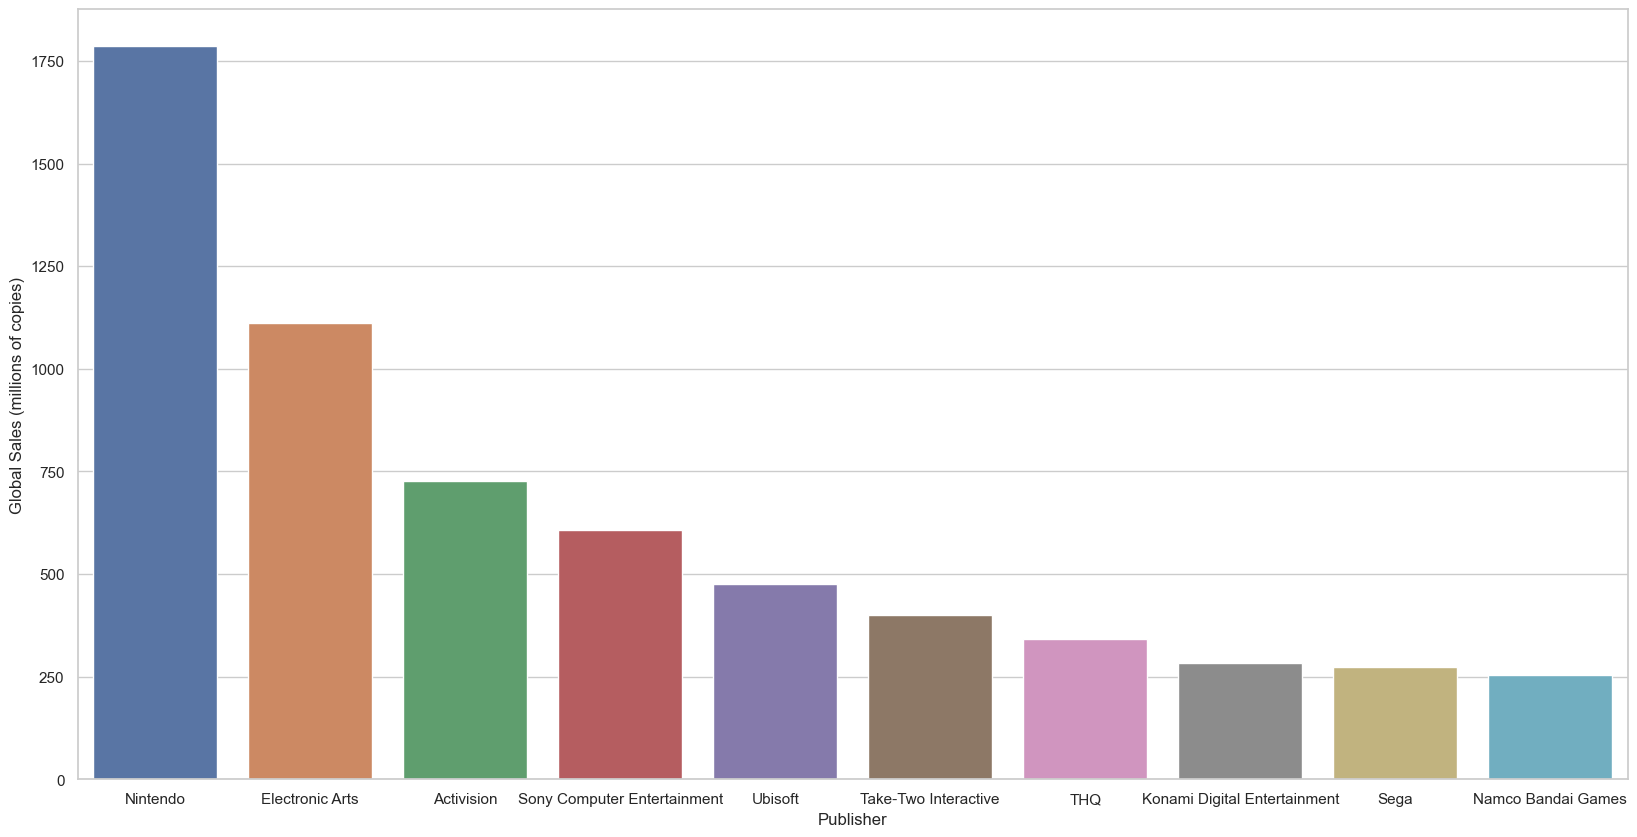

In [266]:
plt.figure(figsize=(20,10))
sns.barplot(x= df_Publisher['Publisher'],
            y= df_Publisher['Global_Sales'],
           dodge= False)
plt.yticks(rotation = 0)
plt.ylabel("Global Sales (millions of copies)")
plt.xlabel('Publisher')
plt.show()

## We can see clearly that Nintendo holds the grater number of selled copies, considering. Then, we see that Eletronic Arts, Activision and Sony Computer Entertaiment were the ones that selled most copies.

# Publisher Top 5 sales per Platform 

In [232]:
df_PubPlat = df[(df['Publisher'] == 'Nintendo') | (df['Publisher'] == 'Electronic Arts') | (df['Publisher'] == 'Activision') | (df['Publisher'] == 'Sony Computer Entertainment')]

In [271]:
df_PubPlat10 = df_PubPlat.groupby(['Publisher', 'Platform'])['Global_Sales'].sum().reset_index().groupby('Publisher').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop = True).sort_values(by=['Global_Sales','Publisher'], ascending = False)

In [272]:
df_PubPlat10

,Publisher,Platform,Global_Sales
10,Nintendo,Wii,390.46
11,Nintendo,DS,349.75
5,Electronic Arts,PS2,255.79
12,Nintendo,GB,230.09
15,Sony Computer Entertainment,PS,193.73
13,Nintendo,NES,183.97
6,Electronic Arts,X360,181.04
16,Sony Computer Entertainment,PS2,172.80
7,Electronic Arts,PS3,168.71
0,Activision,X360,159.02


In [236]:
df.Platform[df['Publisher'] == 'Nintendo']

0         Wii
1         NES
2         Wii
3         Wii
4          GB
         ... 
16269      DS
16357    WiiU
16456    WiiU
16473     Wii
16542     3DS
Name: Platform, Length: 703, dtype: object

<Figure size 3500x1500 with 0 Axes>

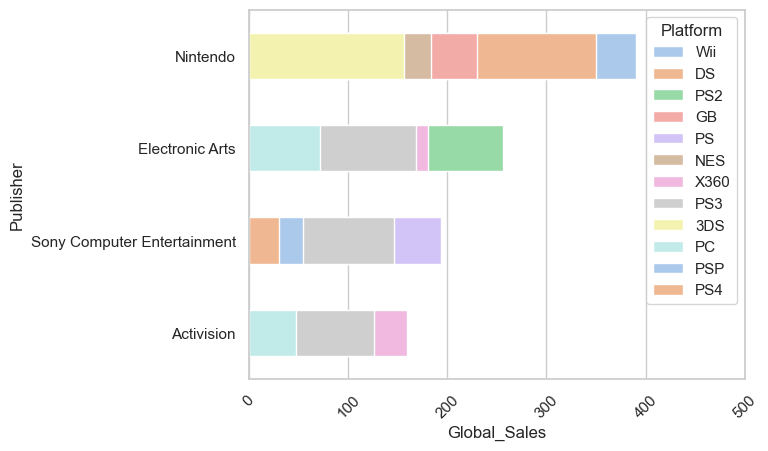

<Figure size 3500x1500 with 0 Axes>

In [291]:
sns.barplot(data= df_PubPlat10, x = 'Global_Sales', y = 'Publisher', hue = 'Platform',dodge= False, width= 0.5, palette='pastel')
plt.xticks(rotation = 45)
plt.xlim(0,500)
plt.figure(figsize= (35,15))

# Nintendo shows that the Wii and DS, were the most valuble consoles for the company, due to the high selling games for those consoles.
# Eletronic Arts was selling mostly to the PS2 users and X360, were both consoles were rivals at the market.
# Sony Computer Entertainment was only selling for Sony's exclusive consoles, which explains a lower number of sales, but showing how strong the demand for the console is as it is one of the biggest publishers with copies of games sold.
# Activision selled mostly to X360, PS3 and PC, probably releasing the same game to various consoles.

# 5 best-selling games for consoles

In [219]:
df_Consoles = df.groupby('Platform')[['Global_Sales']].agg({'Global_Sales':'sum'}).reset_index().sort_values(by ='Global_Sales',ascending = False).head(5)

In [220]:
df_Consoles

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49


<Axes: xlabel='Platform', ylabel='Global_Sales'>

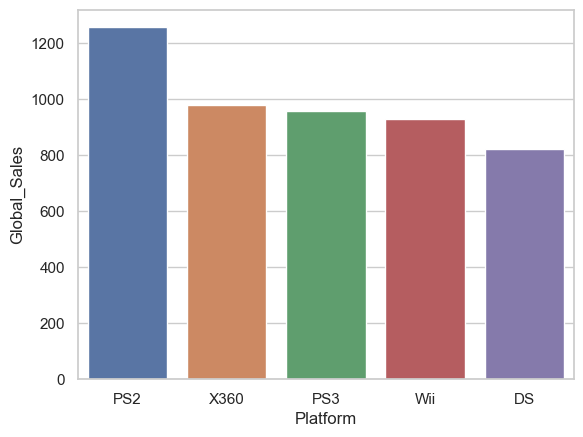

In [293]:
sns.barplot(data= df_Consoles, x = 'Platform', y= 'Global_Sales')

# The PS2 console leads the tier of best-selling copies. This can be explained by the time of your launch, where he was the most popular console on that period, resulting in a large amount os launched games.
# Following by X360, PS3 and Wii, where these three were direct competitors.
# Nintendo DS was the most popular portable console.